### **Exploratory Data Analysis using R- Delhi Weather Data** 
**Problem Statement:** A historical analysis of the evolution of weather conditions in Delhi, owing to the changes occurring due to industrialization, increase of vehicles and climate change.

More information on the dataset can be found here- https://www.kaggle.com/mahirkukreja/delhi-weather-data


In [ ]:
# Setting R environment for best graphic illustrations
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res=200) 

library('tidyverse')  # A widely used R library for data manipulation and visualization

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
data <- read.csv(url("https://raw.githubusercontent.com/wyshnavighag/Insurance-ML-Project/main/testset.csv"),na.strings='..')
str(data)

'data.frame':	100990 obs. of  20 variables:
 $ datetime_utc: chr  "19961101-11:00" "19961101-12:00" "19961101-13:00" "19961101-14:00" ...
 $ X_conds     : chr  "Smoke" "Smoke" "Smoke" "Smoke" ...
 $ X_dewptm    : int  9 10 11 10 11 12 13 13 13 13 ...
 $ X_fog       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X_hail      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X_heatindexm: num  NA NA NA NA NA NA NA NA NA NA ...
 $ X_hum       : chr  "27" "32" "44" "41" ...
 $ X_precipm   : logi  NA NA NA NA NA NA ...
 $ X_pressurem : num  1010 -9999 -9999 1010 1011 ...
 $ X_rain      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X_snow      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X_tempm     : int  30 28 24 24 23 21 21 21 19 19 ...
 $ X_thunder   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X_tornado   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X_vism      : num  5 NA NA 2 1.2 NA 0.8 NA NA NA ...
 $ X_wdird     : int  280 0 0 0 0 0 0 0 0 0 ...
 $ X_wdire     : chr  "West" "North" "North" "North" ...
 $ X_wgustm    : num  NA NA NA NA NA NA NA NA NA NA ...


In [ ]:
dim(data)

[1] 100990     20

In [ ]:
drop <- c("X_fog","X_hail","X_heatindexm","X_precipm","X_rain","X_snow","X_thunder","X_tornado","X_wgustm","X_windchillm")
df <- data %>%
     rename(datetime=datetime_utc,
               Conditions=X_conds,
               Dew=X_dewptm,
               Humidity=X_hum,
               Pressure=X_pressurem,
               Temperature=X_tempm,
               Vism=X_vism,
               Wind_Intensity=X_wdird,
               Wind_Direction=X_wdire,
               WSPDM=X_wspdm)   
dataset <- df[,!(names(df) %in% drop)]
dataset


datetime,Conditions,Dew,Humidity,Pressure,Temperature,Vism,Wind_Intensity,Wind_Direction,WSPDM
<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>
19961101-11:00,Smoke,9,27,1010,30,5.0,280,West,7.4
19961101-12:00,Smoke,10,32,-9999,28,NA,0,North,NA
19961101-13:00,Smoke,11,44,-9999,24,NA,0,North,NA
19961101-14:00,Smoke,10,41,1010,24,2.0,0,North,NA
19961101-16:00,Smoke,11,47,1011,23,1.2,0,North,0.0
19961101-17:00,Smoke,12,56,1011,21,NA,0,North,NA
19961101-18:00,Smoke,13,60,1010,21,0.8,0,North,0.0
19961101-19:00,Smoke,13,60,-9999,21,NA,0,North,NA
19961101-20:00,Smoke,13,68,-9999,19,NA,0,North,NA


In [ ]:
library(lubridate,warn.conflicts=FALSE)
date_time <- ymd_hm(dataset$datetime)

In [ ]:
dataset$Date_Time  <- date_time
dataset <- dataset[,!names(dataset) %in% "datetime"]
head(dataset)

,Conditions,Dew,Humidity,Pressure,Temperature,Vism,Wind_Intensity,Wind_Direction,WSPDM,Date_Time
,<chr>,<int>,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<dttm>
1,Smoke,9,27,1010,30,5.0,280,West,7.4,1996-11-01 11:00:00
2,Smoke,10,32,-9999,28,NA,0,North,NA,1996-11-01 12:00:00
3,Smoke,11,44,-9999,24,NA,0,North,NA,1996-11-01 13:00:00
4,Smoke,10,41,1010,24,2.0,0,North,NA,1996-11-01 14:00:00
5,Smoke,11,47,1011,23,1.2,0,North,0.0,1996-11-01 16:00:00
6,Smoke,12,56,1011,21,NA,0,North,NA,1996-11-01 17:00:00


In [ ]:
dataset$Date <- as.Date(dataset$Date_Time)
dataset$Time <- format(as.POSIXct(dataset$Date_Time),format="%H:%M")
dataset <- dataset[,!names(dataset) %in% "Date_Time"]
head(dataset)

,Conditions,Dew,Humidity,Pressure,Temperature,Vism,Wind_Intensity,Wind_Direction,WSPDM,Date,Time
,<chr>,<int>,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<date>,<chr>
1,Smoke,9,27,1010,30,5.0,280,West,7.4,1996-11-01,11:00
2,Smoke,10,32,-9999,28,NA,0,North,NA,1996-11-01,12:00
3,Smoke,11,44,-9999,24,NA,0,North,NA,1996-11-01,13:00
4,Smoke,10,41,1010,24,2.0,0,North,NA,1996-11-01,14:00
5,Smoke,11,47,1011,23,1.2,0,North,0.0,1996-11-01,16:00
6,Smoke,12,56,1011,21,NA,0,North,NA,1996-11-01,17:00


In [ ]:
summary(dataset)

  Conditions             Dew           Humidity            Pressure        
 Length:100990      Min.   :-24.00   Length:100990      Min.   :    -9999  
 Class :character   1st Qu.: 10.00   Class :character   1st Qu.:     1002  
 Mode  :character   Median : 15.00   Mode  :character   Median :     1008  
                    Mean   : 15.74                      Mean   :     1932  
                    3rd Qu.: 22.00                      3rd Qu.:     1014  
                    Max.   : 75.00                      Max.   :101061443  
                    NA's   :621                         NA's   :232        
  Temperature         Vism          Wind_Intensity  Wind_Direction    
 Min.   : 1.00   Min.   :   0.000   Min.   :  0.0   Length:100990     
 1st Qu.:19.00   1st Qu.:   1.500   1st Qu.: 50.0   Class :character  
 Median :27.00   Median :   2.000   Median :160.0   Mode  :character  
 Mean   :25.45   Mean   :   2.403   Mean   :163.6                     
 3rd Qu.:32.00   3rd Qu.:   3.000   3

In [ ]:
tail(dataset)

,Conditions,Dew,Humidity,Pressure,Temperature,Vism,Wind_Intensity,Wind_Direction,WSPDM,Date,Time
,<chr>,<int>,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<date>,<chr>
100985,Haze,16,38,1006,28,4,0,North,14.8,2017-04-24,03:00
100986,Haze,17,25,1005,34,4,320,NW,11.1,2017-04-24,06:00
100987,Haze,14,16,1003,38,4,320,NW,22.2,2017-04-24,09:00
100988,Haze,12,14,1002,36,4,270,West,18.5,2017-04-24,12:00
100989,Haze,15,27,1004,32,2,320,NW,3.7,2017-04-24,15:00
100990,Haze,15,30,1005,30,2,320,NW,3.7,2017-04-24,18:00


In [ ]:
dim(dataset) 

[1] 100990     11

In [ ]:
# Command return TRUE if x is missing
colSums(is.na(dataset))


Conditions            Dew       Humidity       Pressure    Temperature 
             0            621              0            232            673 
          Vism Wind_Intensity Wind_Direction          WSPDM           Date 
          4428          14755              0           2358              0 
          Time 
             0

In [ ]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



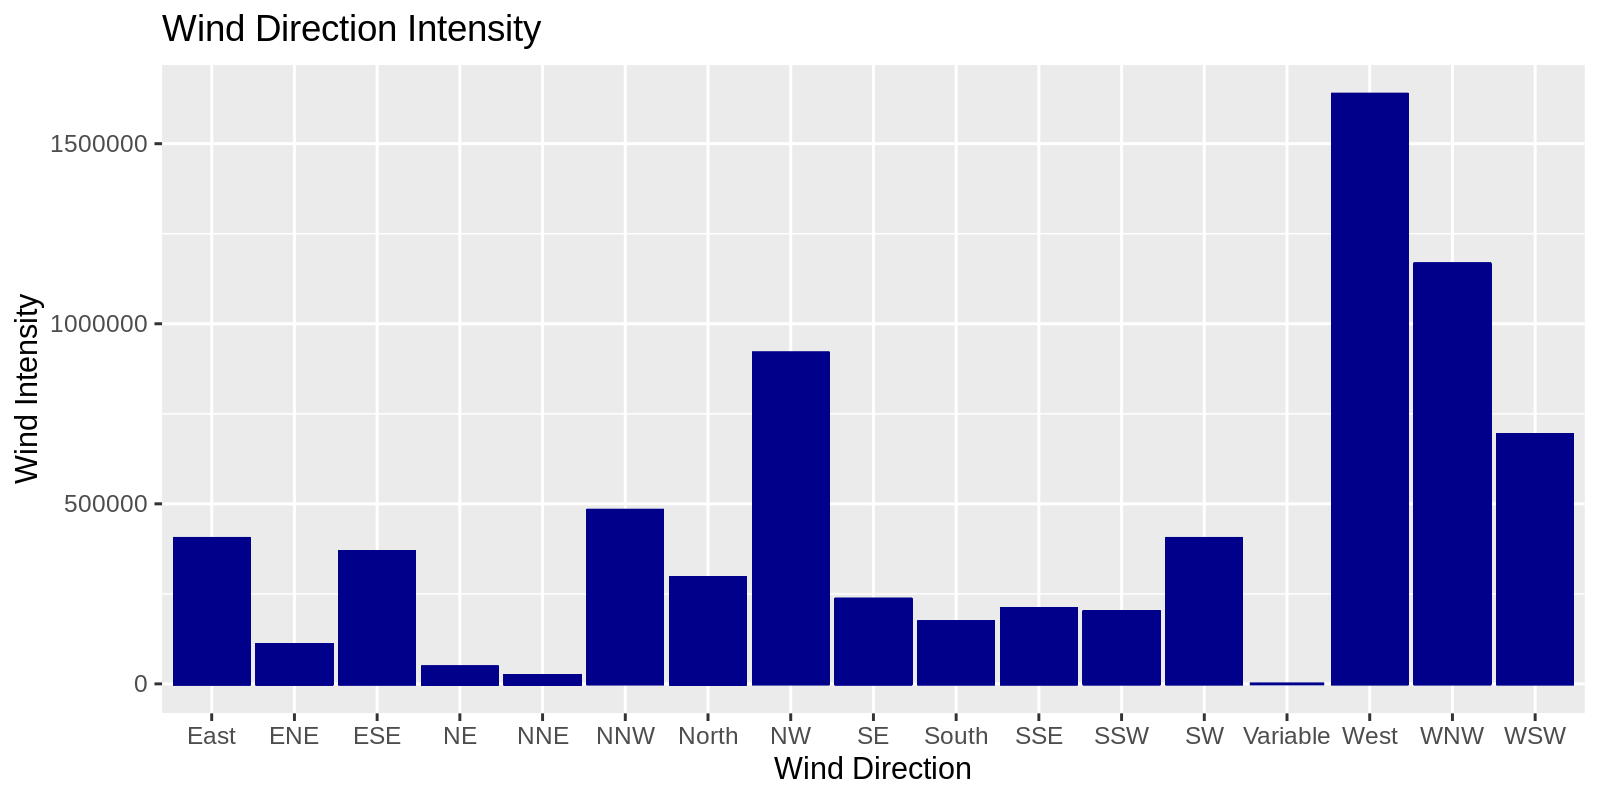

In [ ]:


df1 <- dataset %>%  
     slice(100:50000)

ggplot(df1,mapping=aes(x=Wind_Direction,y=Wind_Intensity)) +geom_bar(stat='identity',color = 'darkblue') + labs(title = 'Wind Direction Intensity',
       y='Wind Intensity',x='Wind Direction')

# It can be observed that westward winds are the most frequent and strongest, followed by northward winds. Southward and Eastward winds are 
# comparatively less frequent, giving an idea of the location of our area and related topography. 

#### It can be observed that westward winds are the most frequent and strongest, followed by northward winds. Southward and Eastward winds are comparatively less frequent, giving an idea of the location of our area and related topography. 

In [ ]:
df2 <-dataset[c('Date','Time','Temperature','Conditions')] %>%
      slice(15000:25000)

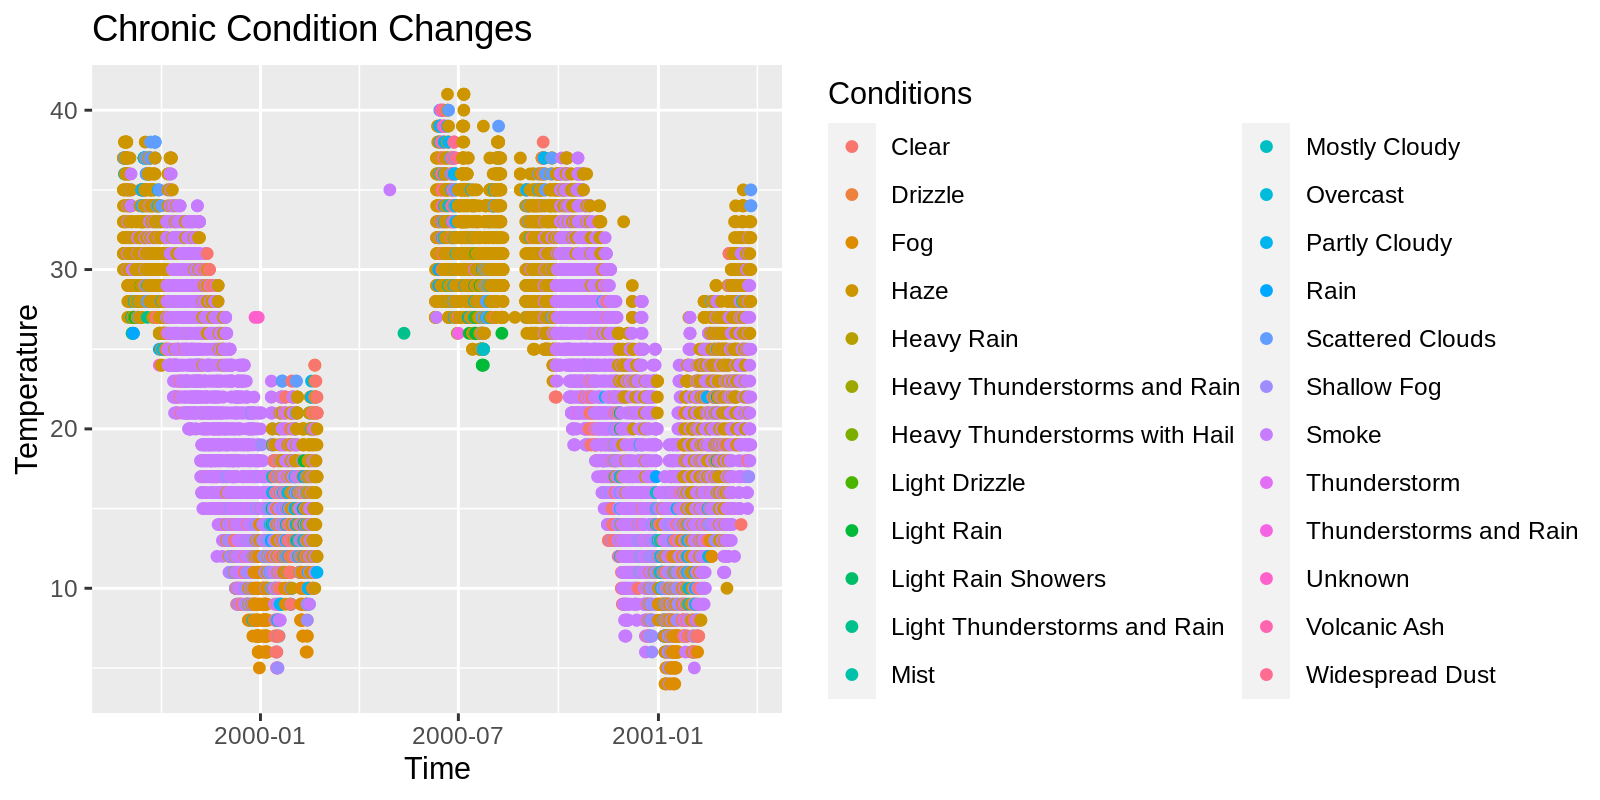

In [ ]:
df3 <- dataset %>%  
       slice(15000:25000)

plt_3 <- ggplot(df3,mapping=aes(x=Date,y=Temperature,color = Conditions),format(Date,"%m ")) +geom_point() + labs(title = 'Chronic Condition Changes',
       y='Temperature',x='Time')

suppressWarnings(print(plt_3))

# Here it can be seen that regardless of the variation in temperature, the conditions are dominated by Smoke, Haze and Fog
# This is a small indicator of Delhi's air pollution problem, as smoke and haze is caused as a result of vehicle emissions and industry residue

 #### Here it can be seen that regardless of the variation in temperature, the conditions are dominated by Smoke, Haze and Fog. This is a small indicator of Delhi's air pollution problem, as smoke and haze is caused as a result of vehicle emissions and industry residue

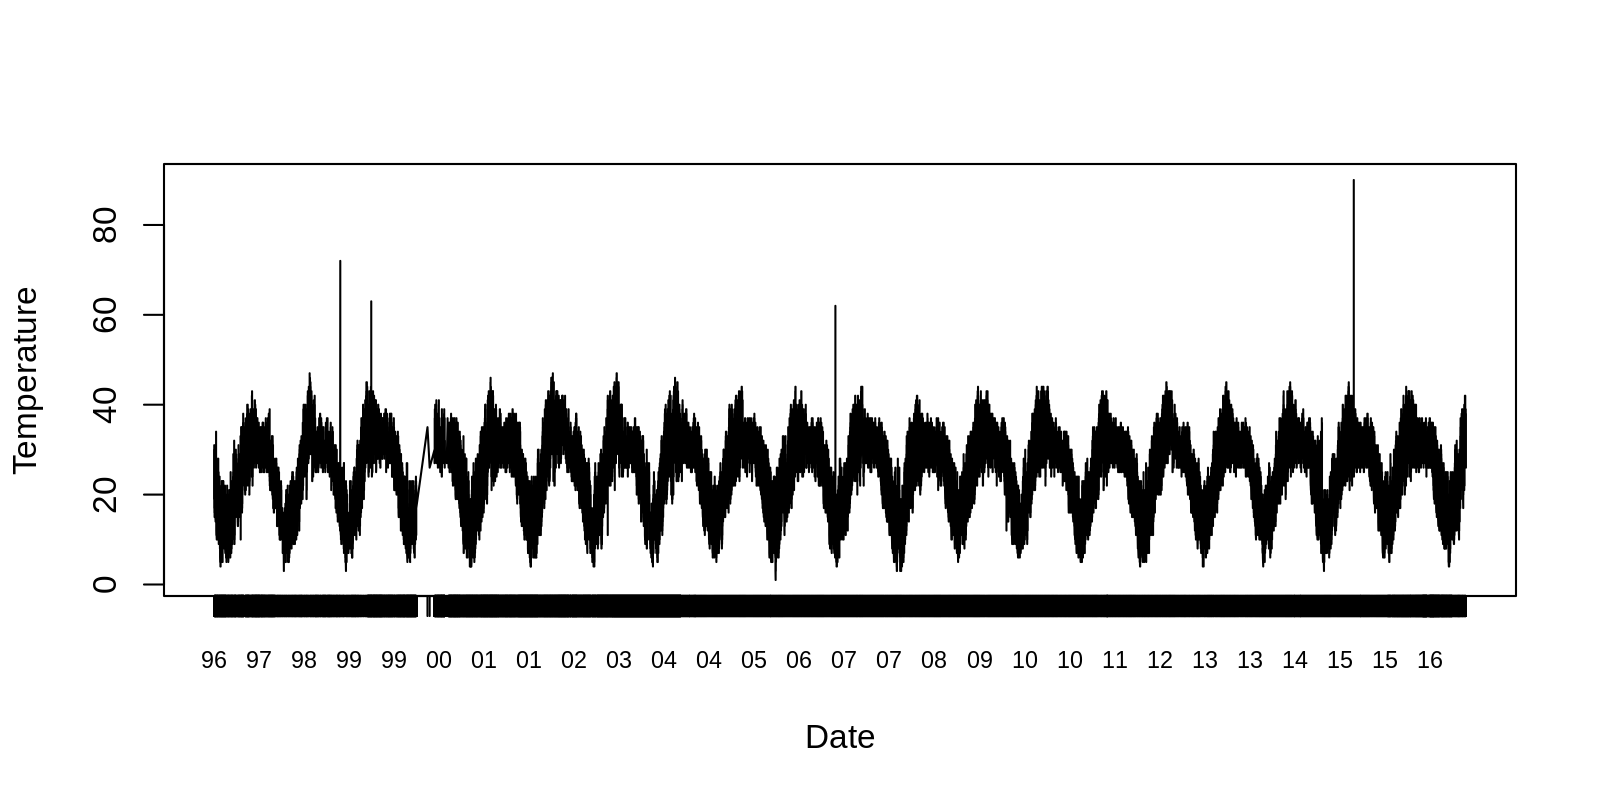

In [ ]:
dm <- dataset 
dm$Date <- as.Date(dataset$Date, "%m/%d/%Y")
plot(Temperature ~ Date, dm, xaxt = "n", type = "l")
axis(1, dm$Date, format(dm$Date, "%y"), cex.axis = .7)

In [ ]:
df1 <-dataset[c('Date','Temperature')]


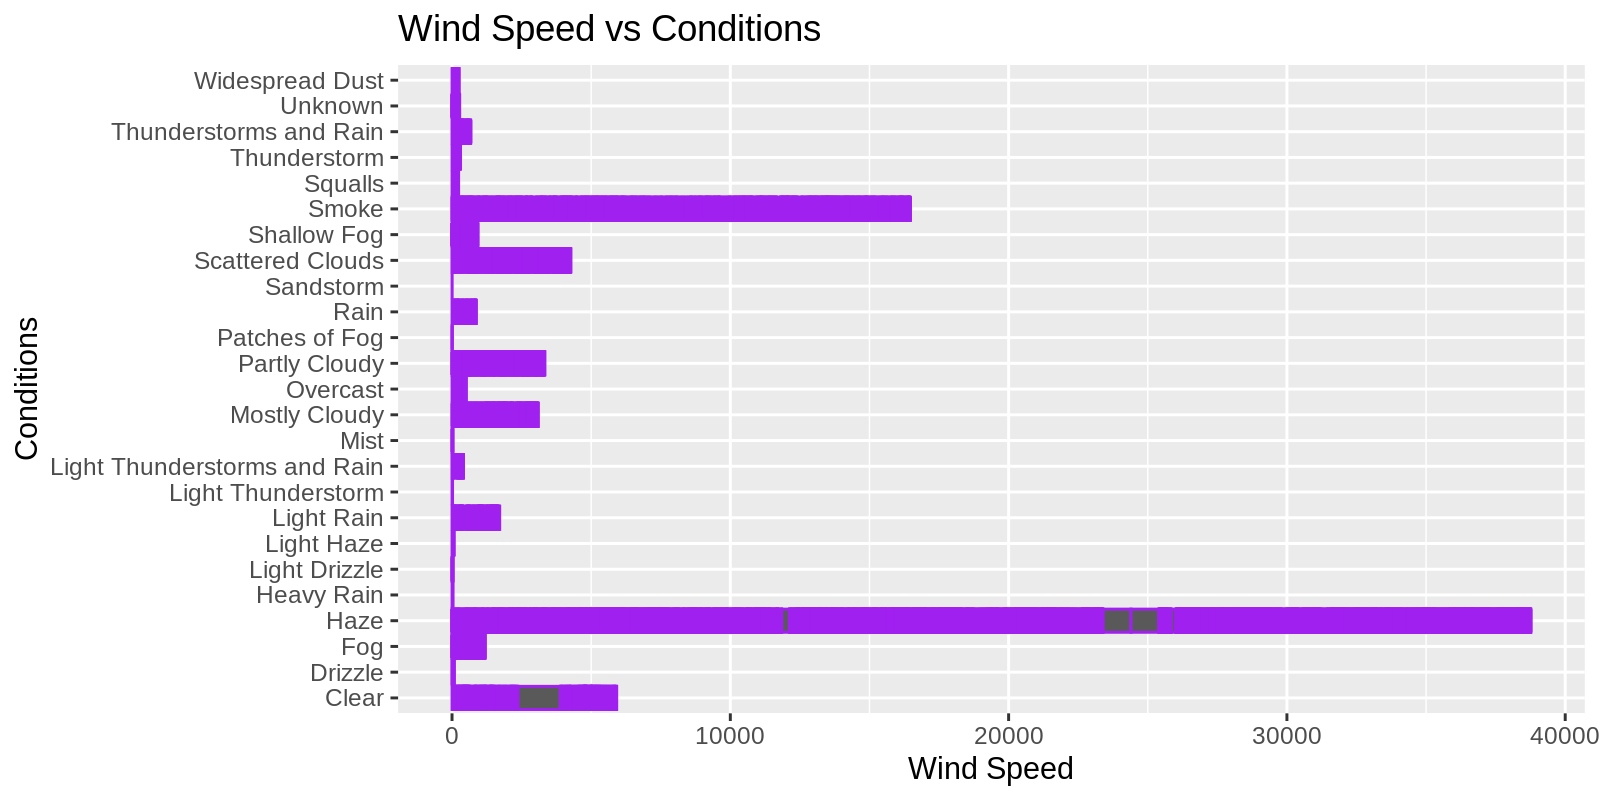

In [ ]:
df4 <- dataset %>%  
     slice(1:10000) %>%
     drop_na(WSPDM)
ggplot(df4,mapping=aes(y=Conditions,x=WSPDM,group=1),na.rm=TRUE) +geom_bar(stat='identity',color='purple',na.rm=TRUE) + labs(title = 'Wind Speed vs Conditions',y='Conditions',x='Wind Speed')

#suppressWarnings(print(plt_4))





##### This comparison shows that wind speeds are higher for the most common conditions such as haze and smoke. But as is expected, they are high for clear conditions as well. There is a slight spike in wind speeds for scattered clouds and cloudy conditions.

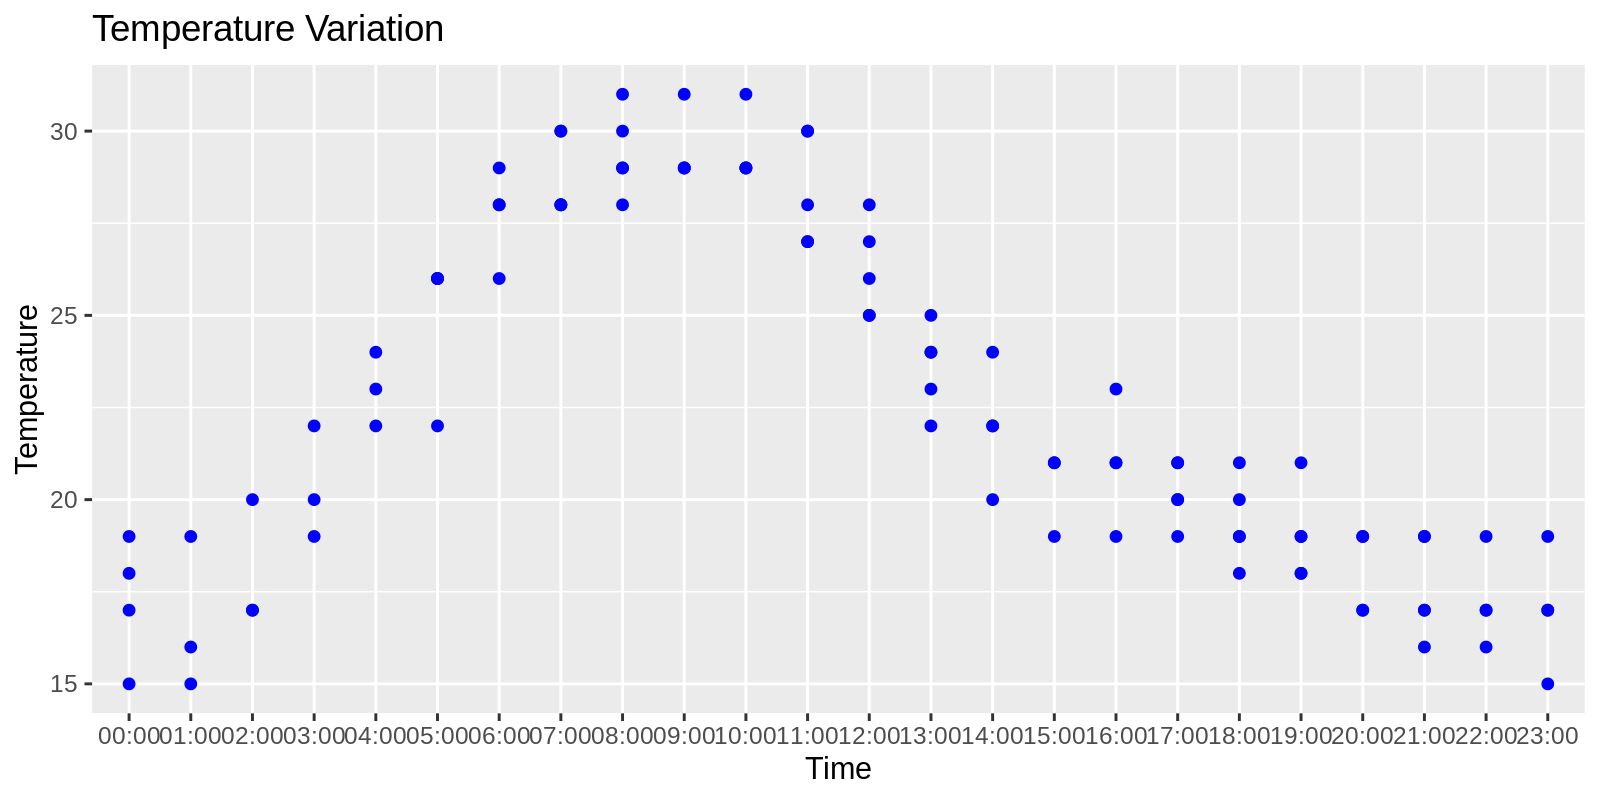

In [ ]:
df5 <- dataset %>%
      slice(1:100) 
ggplot(df5,mapping=aes(y=Temperature,x=Time)) + geom_point(color='blue')+ labs(title='Temperature Variation',y='Temperature',x='Time')

####The rough variation of temperature across the hours of a day shows that the temperature peaks between 10 am and 12 pm. 

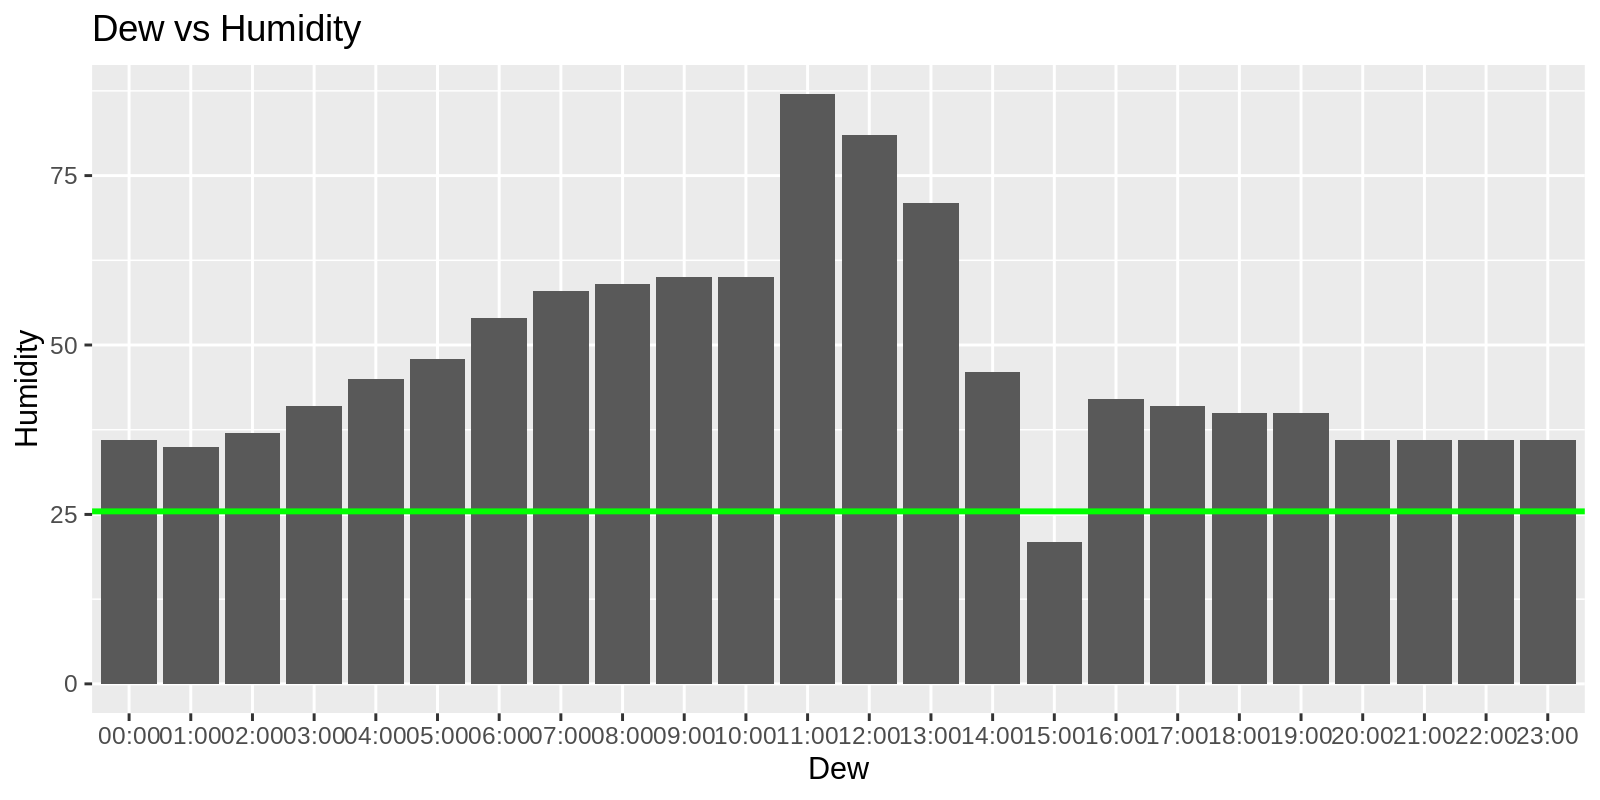

In [ ]:

df8 <- dataset %>%
       slice(1:50)

ggplot(data=df8,aes(y=Temperature,x=Time)) + 
  geom_bar(stat ='identity',aes(x=Time))+
 
  scale_fill_gradient(name="Maths Score Level")+
  labs(title = 'Dew vs Humidity',
       y='Humidity',x='Dew')+ 
  geom_hline(yintercept=(mean(dataset$Temperature,na.rm=TRUE)),size = 1, color = 'green')

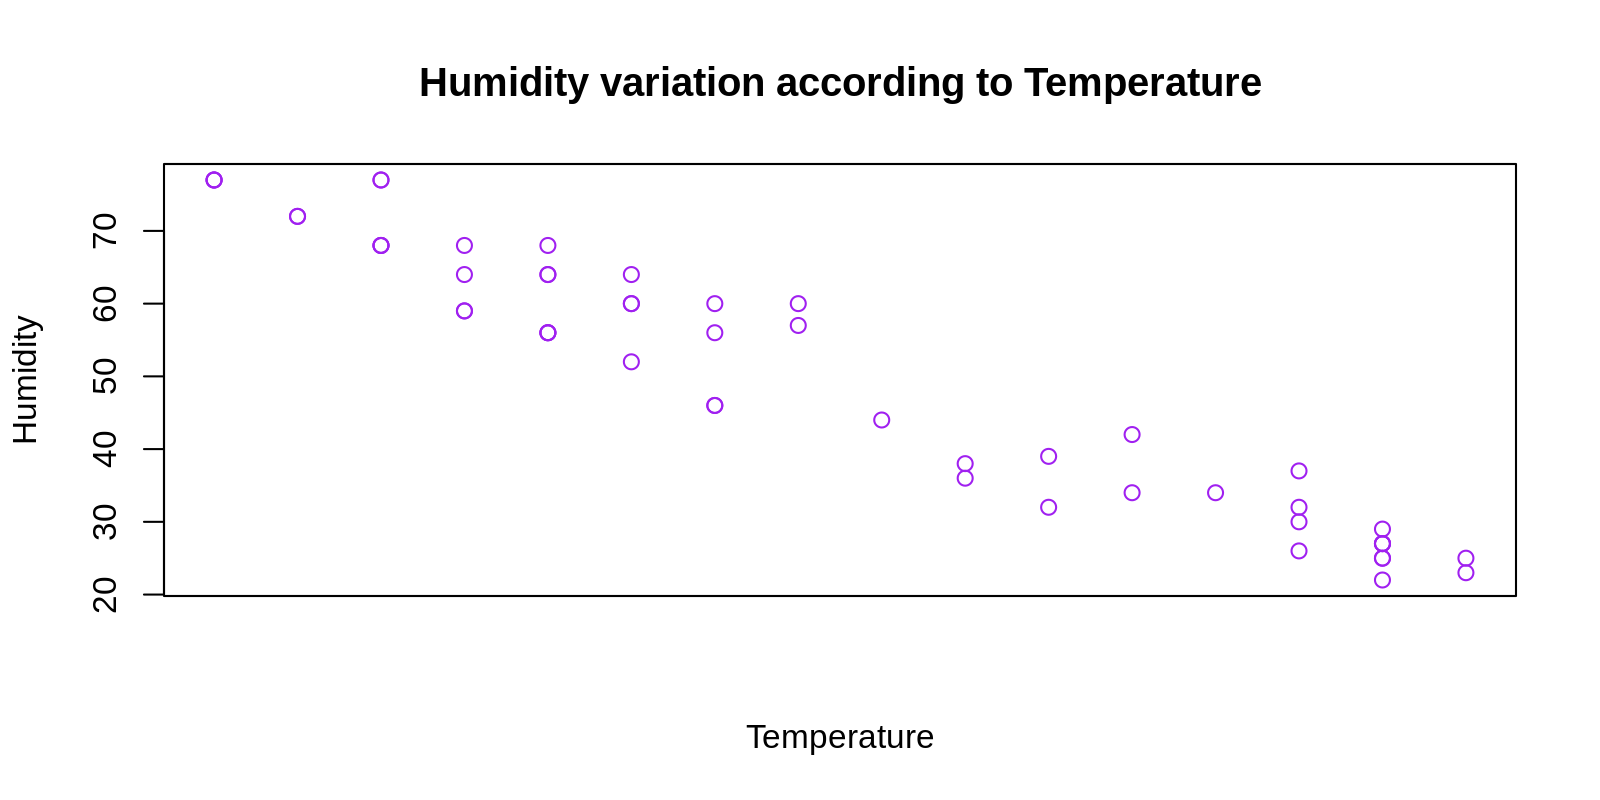

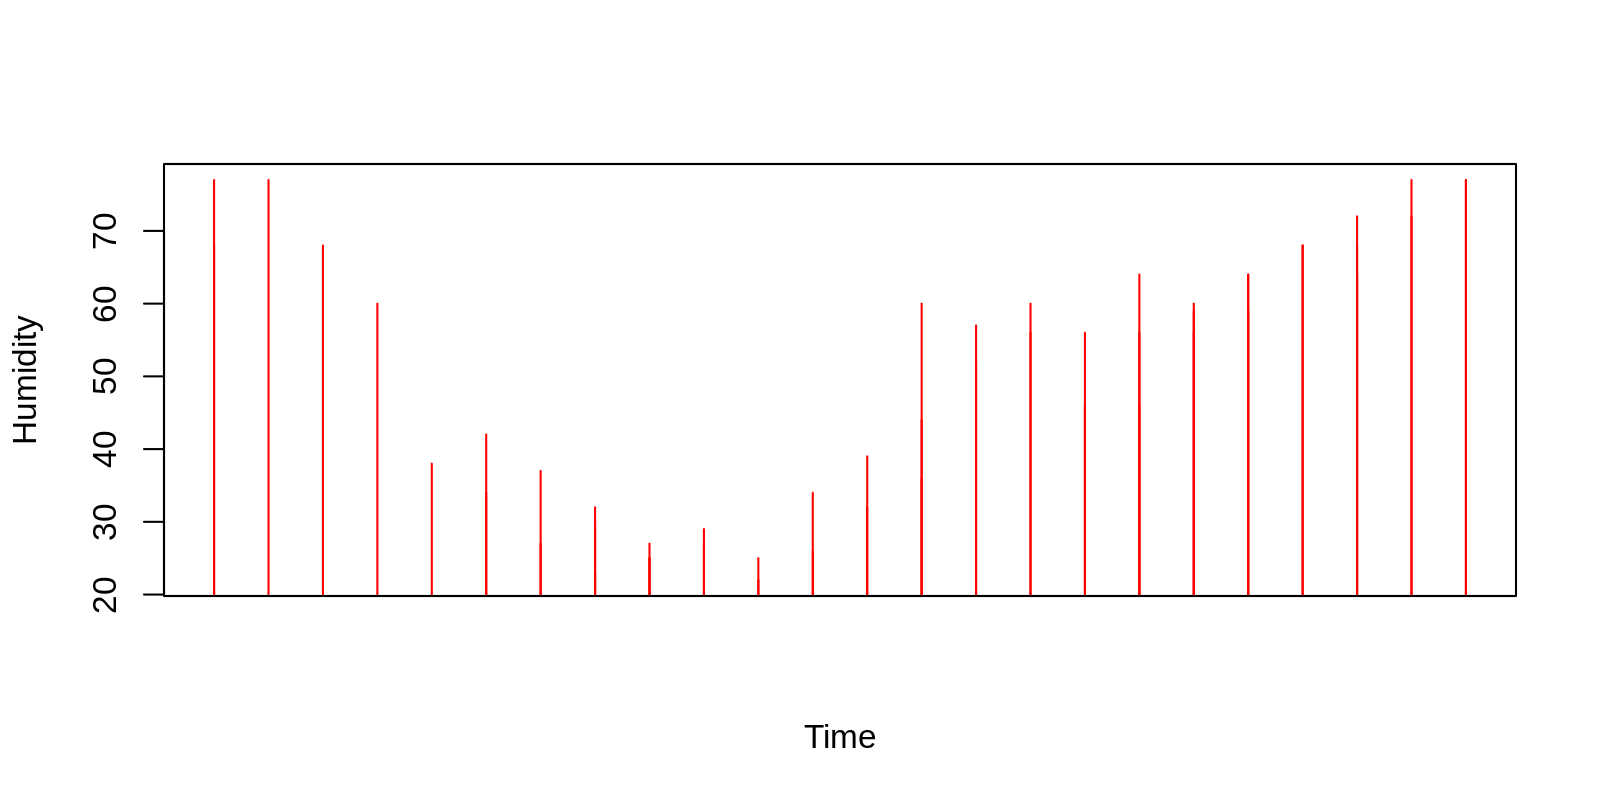

integer(0)

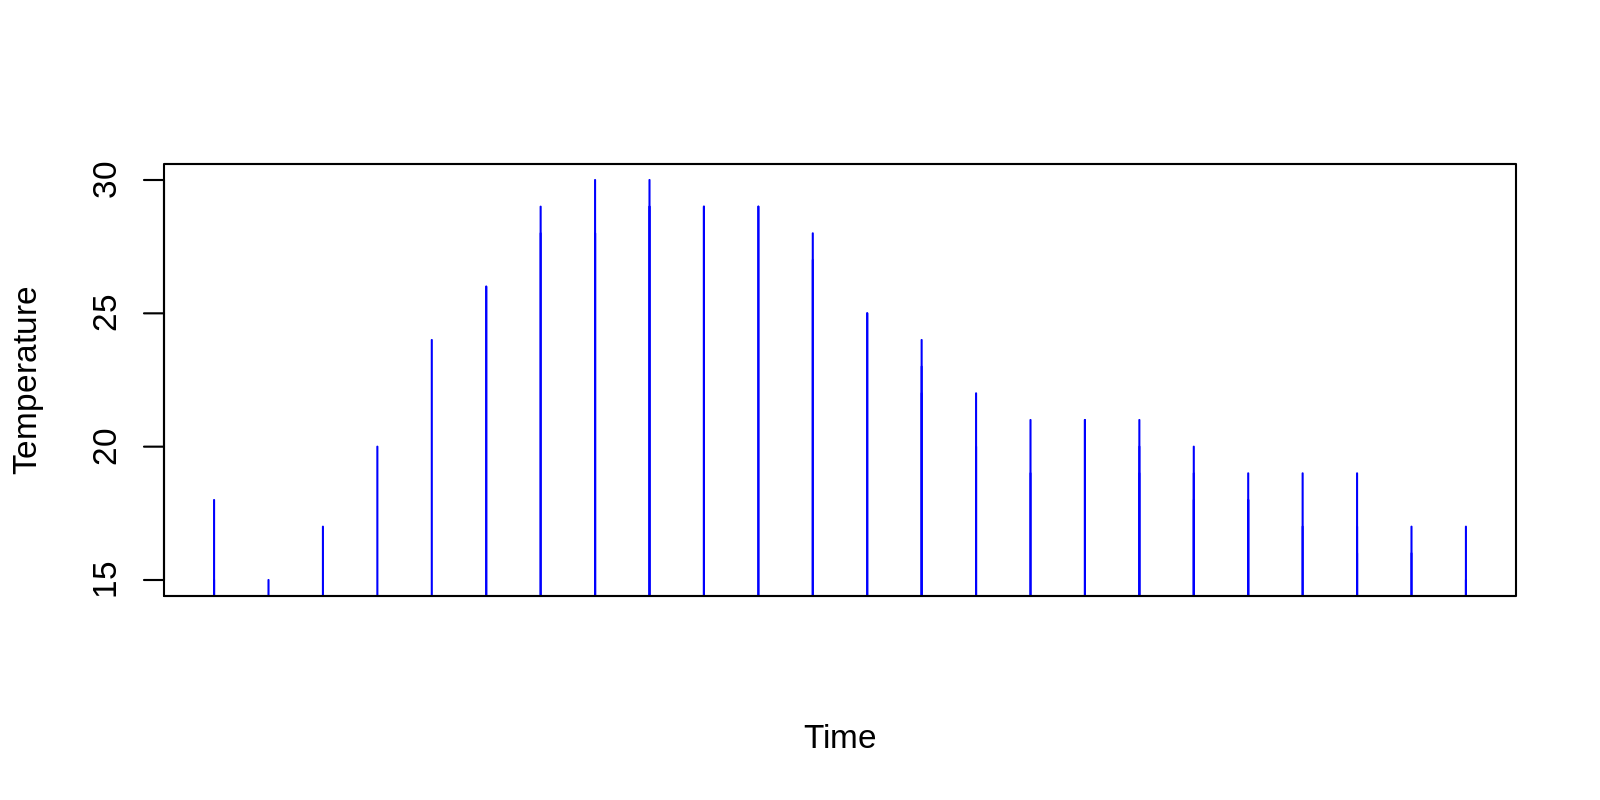

In [ ]:
dataset$Time <- as.POSIXct(dataset$Time,format="%H:%M")
dt <- dataset %>%
      slice(50:100)
plot(Humidity ~ Temperature, dt, xaxt = "n", type = "p",main='Humidity variation according to Temperature',col='purple')+
plot(Humidity ~ Time, dt, xaxt = "n", type = "h",col='red')+
plot(Temperature ~ Time, dt, xaxt = "n", type = "h",col='blue')
axis(1, dt$Temperature, cex.axis = .7)



####Based on these three graphs taken for the same slice of data, it can be inferred that:

1. Humidity is the highest at lower temperatures, and keeps on falling as temperature increases.

2. The humidity is highest towards the end of the day, and through the early hours of the morning. (21:00 to 03:00)

3. The temperature during the day is lowest from the end of the day through to early morning. (21:00 to 03:00)

In [ ]:
suppressWarnings(mean(as.numeric(dataset$Humidity),na.rm=TRUE))

[1] 57.90948

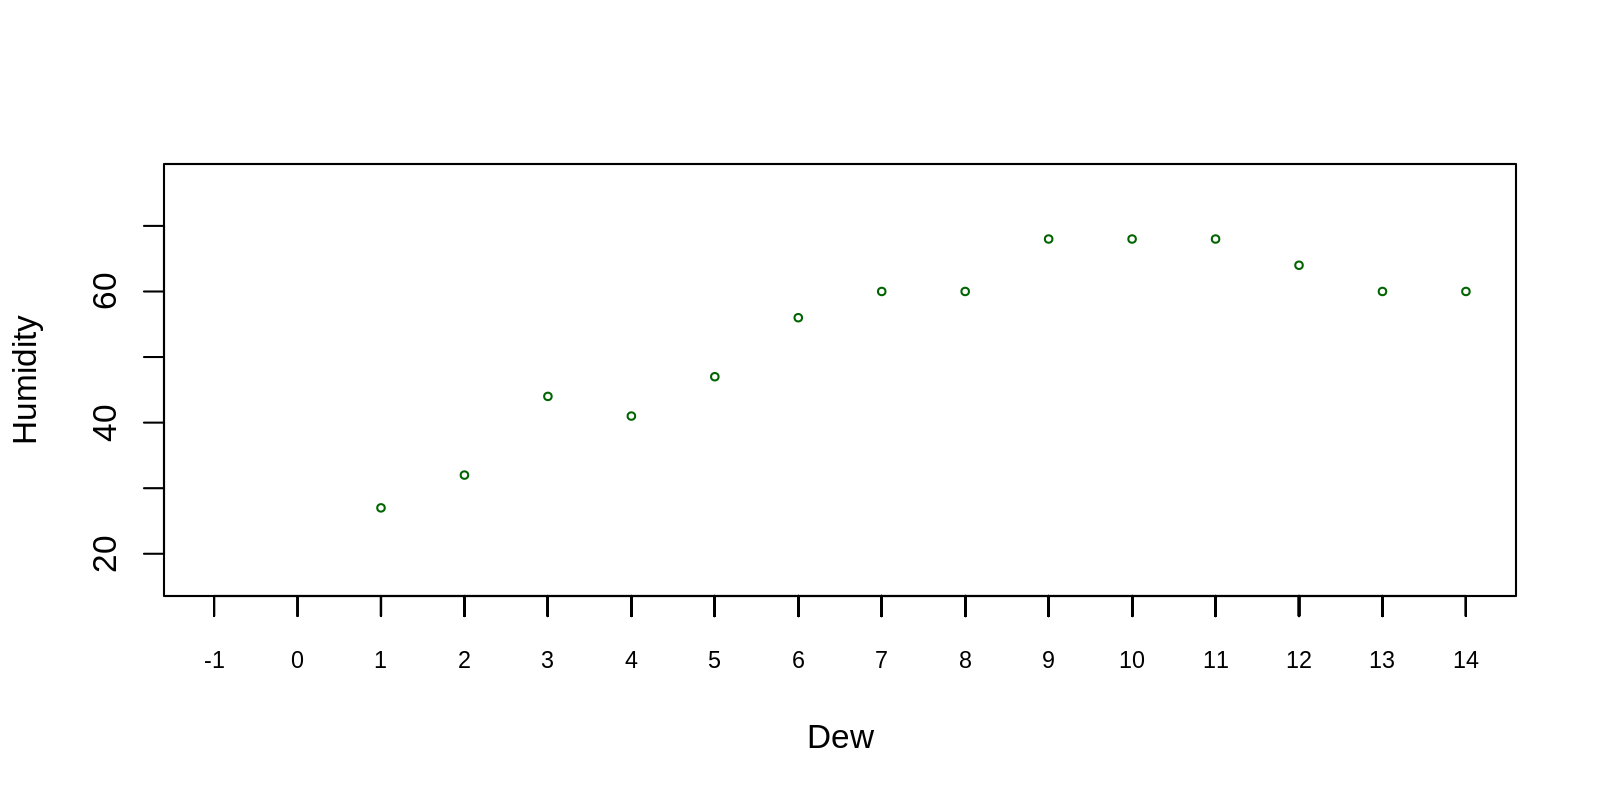

In [ ]:
df7 <- dataset %>%
       slice(1:500)
suppressWarnings(plot(Humidity ~ Dew, df7, xaxt="n",type="n",col='purple'))
suppressWarnings(points(df7$Humidity,cex = .5, col = "dark green"))
axis(1, df7$Dew, cex.axis = .7)


####This plot shows the relation between Humidity and Dew. As is observed, Humidity tends to rise as Dew rises, but upto a certain point. The highest value of Dew is not the highest Humidity value.

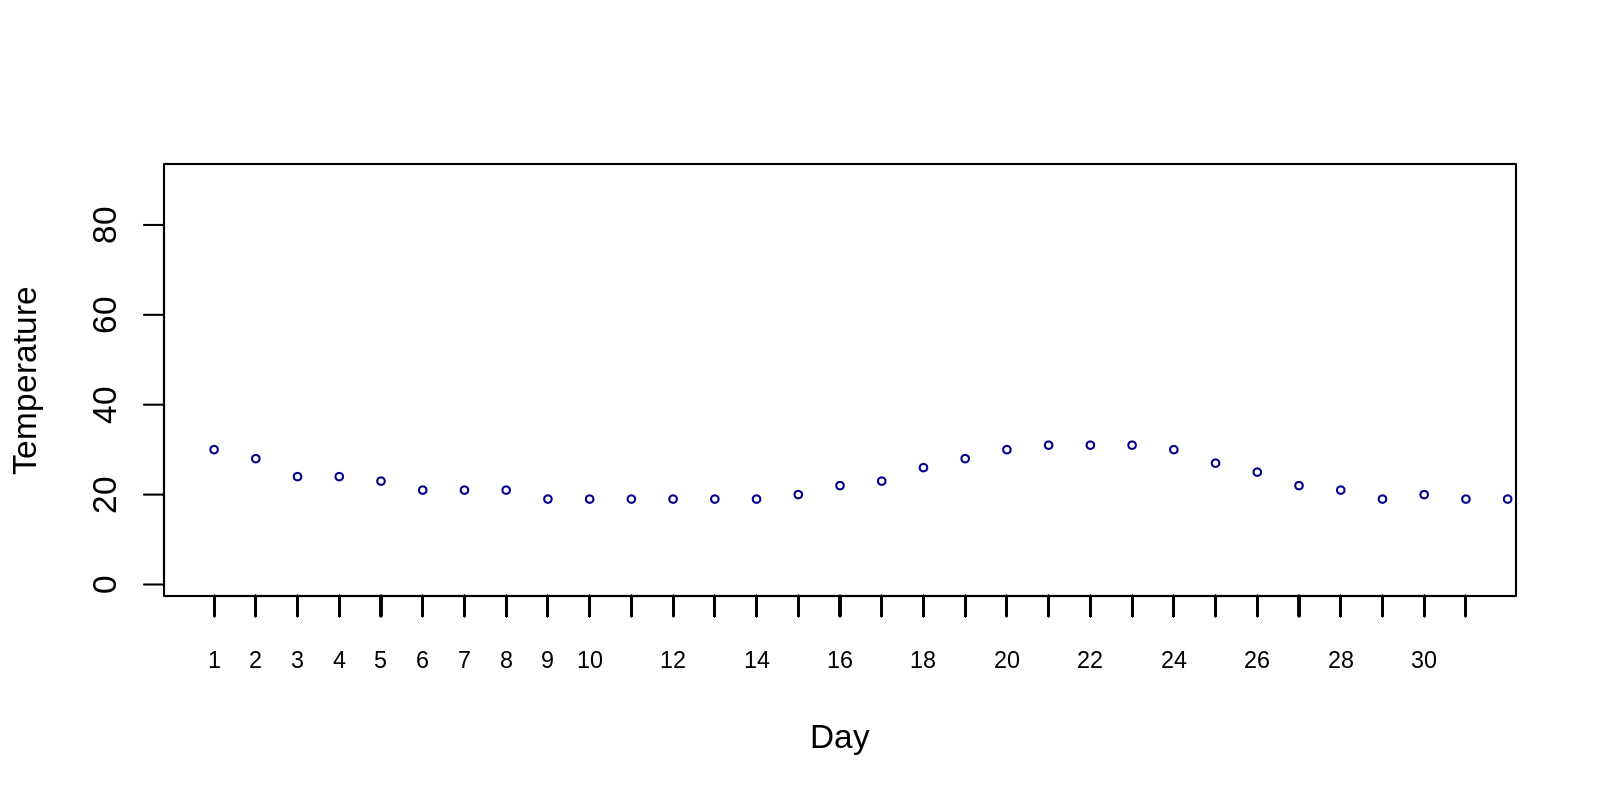

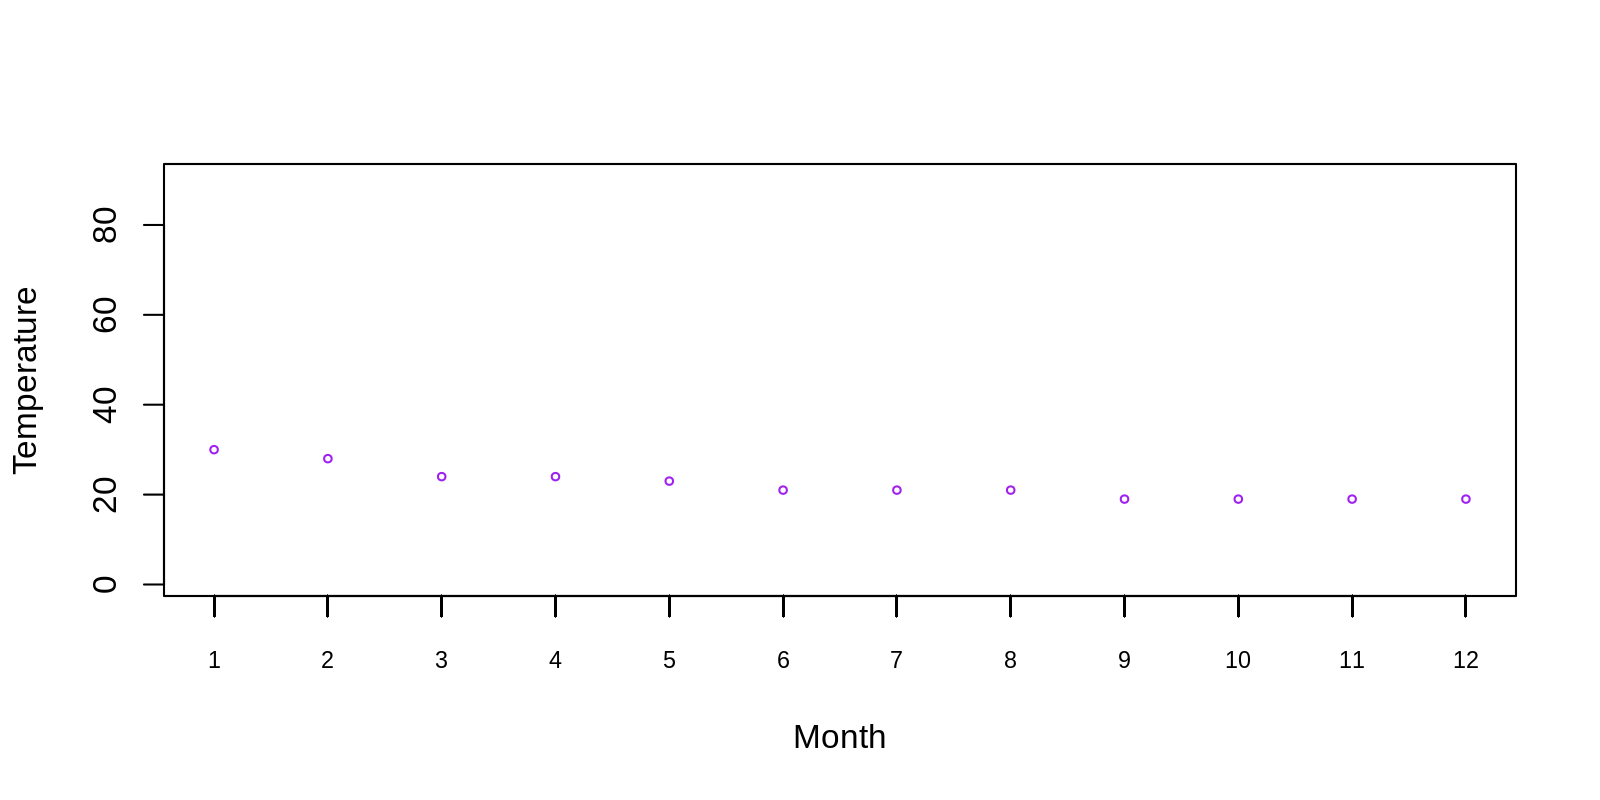

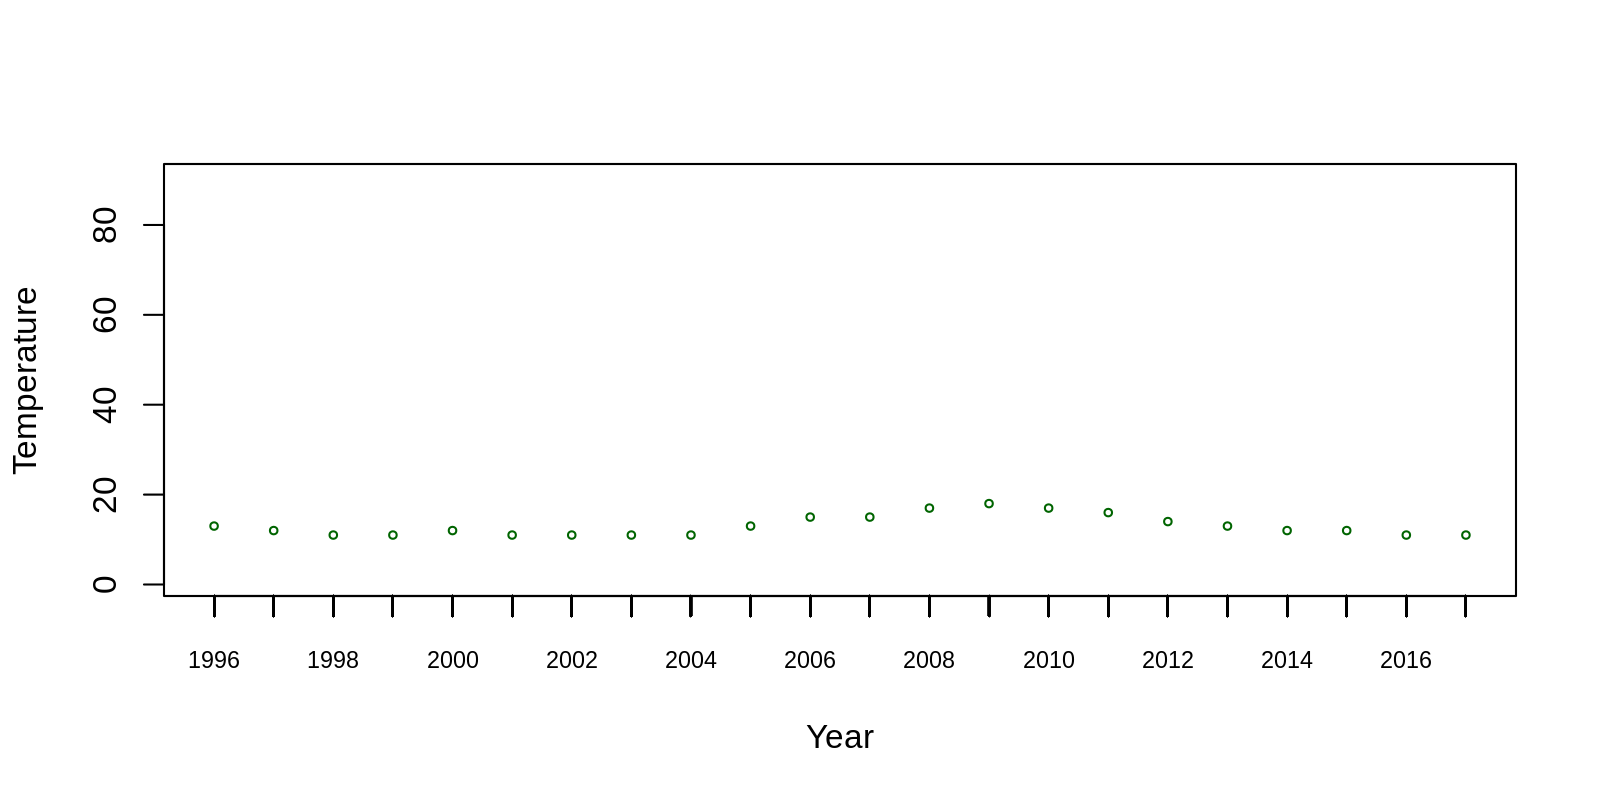

In [ ]:
ds <- dataset[c('Temperature','Time')]
ds$Day <- format(as.Date(dataset$Date,format="%Y-%m-%d"), format = "%d")
ds$Month <- format(as.Date(dataset$Date,format="%Y-%m-%d"), format = "%m")
ds$Year <- format(as.Date(dataset$Date,format="%Y-%m-%d"), format = "%Y")

plot(Temperature ~ Day, ds, xaxt = "n", type = "n",col='red')
points(ds$Temperature,cex = .5, col = "dark blue")
axis(1, ds$Day, cex.axis = .7)

plot(Temperature ~ Month, ds, xaxt = "n", type = "n",col='red')
points(ds$Temperature,cex = .5, col = "purple")
axis(1, ds$Month, cex.axis = .7)

plot(Temperature ~ Year, ds, xaxt = "n", type = "n",col='red')
points(ds$Temperature,cex = .5, col = "dark green")
axis(1, ds$Year, cex.axis = .7)


####The following graphs illustrate the variation of temperature over days of the month, months in the year, and over the years. It is useful in noting the temeperature variation taking place in varying timeframes, making it easier to make a few observations with regards to temperature variation.

In [2]:
x <- c(3, 7, NA, 4, 7)
y <- c(5, NA, 1, 2, 2)
 x + y 


[1]  8 NA NA  6  9